In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [15]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [12, 6]
sns.set()

In [16]:
auto = pd.read_csv('automobile_sale_76Jan-20Dec_monthly.csv', parse_dates = True, index_col = 'DATE')
auto_start_index = '2001-01-01'
auto_end_index = '2020-01-01'
auto = auto[auto_start_index:auto_end_index]
auto

,TOTALSA
DATE,
2001-01-01,17.652
2001-02-01,17.826
2001-03-01,17.248
2001-04-01,16.872
2001-05-01,16.876
...,...
2019-09-01,17.643
2019-10-01,17.273
2019-11-01,17.437


In [17]:
upsampled_auto = auto.resample('W').ffill()
upsampled_auto.drop(upsampled_auto.tail(1).index,inplace=True)
upsampled_auto

,TOTALSA
DATE,
2001-01-07,17.652
2001-01-14,17.652
2001-01-21,17.652
2001-01-28,17.652
2001-02-04,17.826
...,...
2019-12-01,17.289
2019-12-08,17.289
2019-12-15,17.289


In [18]:
sigma = upsampled_auto.std()
mu = 0 # mean and standard deviation
variations = np.random.normal(mu, sigma*np.sqrt(1/4), 991)
variations

array([-2.28551114e-02,  1.98690753e-01, -1.15296089e+00, -3.48878964e+00,
       -9.08427667e-01,  1.00317559e+00,  8.04054662e-01, -1.26716070e+00,
        5.44119173e-01,  2.02850863e+00,  9.21940927e-01,  3.58315442e-01,
       -2.30958461e-01, -4.48919198e-01, -7.74254690e-02,  1.44377780e-01,
        2.43430893e+00,  8.98785159e-01,  9.49849820e-01,  1.60019209e+00,
       -2.48914159e+00, -5.90154178e-01, -3.70648256e-01,  2.70584974e-01,
       -4.50299715e-01, -5.70869469e-01, -1.40157084e+00,  7.58388411e-01,
        1.30585431e+00, -2.38213604e+00,  1.09767746e+00,  1.68590504e+00,
        5.55180411e-02,  7.93311145e-02, -8.81897620e-01, -1.10983791e+00,
        1.14185299e+00, -1.34857983e+00,  6.18778690e-01,  1.25345277e+00,
        1.68939610e+00,  3.19232382e-02, -9.94487625e-01, -1.76688986e+00,
       -3.32238796e+00, -6.64797756e-01,  1.36933412e-01,  1.77744832e+00,
        1.61632823e+00,  7.79409720e-01, -8.31529223e-01,  5.48887450e-01,
        1.25785052e-01, -

In [19]:
upsampled_auto_series = pd.DataFrame.to_numpy(upsampled_auto).flatten()
upsampled_auto_series = upsampled_auto_series + variations
upsampled_auto_series

array([17.62914489, 17.85069075, 16.49903911, 14.16321036, 16.91757233,
       18.82917559, 18.63005466, 16.5588393 , 17.79211917, 19.27650863,
       18.16994093, 17.60631544, 16.64104154, 16.4230808 , 16.79457453,
       17.01637778, 19.30630893, 17.77478516, 17.82584982, 18.47619209,
       14.38685841, 16.87384582, 17.09335174, 17.73458497, 17.01370028,
       15.89213053, 15.06142916, 17.22138841, 17.76885431, 14.08086396,
       17.44567746, 18.03390504, 16.40351804, 16.42733111, 15.48310238,
       15.25516209, 17.50685299, 15.01642017, 16.98377869, 23.30845277,
       23.7443961 , 22.08692324, 21.06051237, 16.26411014, 14.70861204,
       17.36620224, 18.16793341, 18.24244832, 18.08132823, 17.24440972,
       15.63347078, 17.01388745, 16.64878505, 16.40635558, 15.85709733,
       16.33249528, 17.0320883 , 16.53498388, 15.67573691, 17.45394346,
       17.57465978, 16.38951289, 15.36340823, 16.72384284, 18.34379262,
       17.38215236, 15.7214982 , 18.84277914, 17.51515249, 15.98

In [20]:
upsampled_auto['TOTALSA']  = upsampled_auto_series
upsampled_auto

,TOTALSA
DATE,
2001-01-07,17.629145
2001-01-14,17.850691
2001-01-21,16.499039
2001-01-28,14.163210
2001-02-04,16.917572
...,...
2019-12-01,17.941804
2019-12-08,14.872529
2019-12-15,18.616565


In [21]:
upsampled_auto_01_08 = upsampled_auto[:417]
upsampled_auto_01_08

,TOTALSA
DATE,
2001-01-07,17.629145
2001-01-14,17.850691
2001-01-21,16.499039
2001-01-28,14.163210
2001-02-04,16.917572
...,...
2008-11-30,10.745410
2008-12-07,12.533865
2008-12-14,10.298568


In [22]:
upsampled_auto_09_19 = upsampled_auto[417:]
upsampled_auto_09_19

,TOTALSA
DATE,
2009-01-04,10.535732
2009-01-11,8.347124
2009-01-18,8.574011
2009-01-25,8.961935
2009-02-01,9.348876
...,...
2019-12-01,17.941804
2019-12-08,14.872529
2019-12-15,18.616565


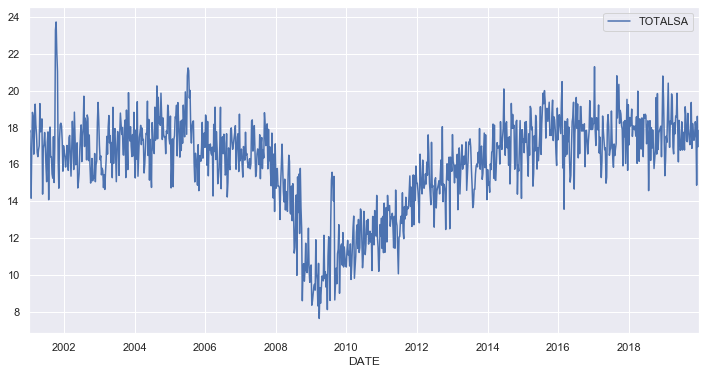

In [23]:
upsampled_auto.plot.line()

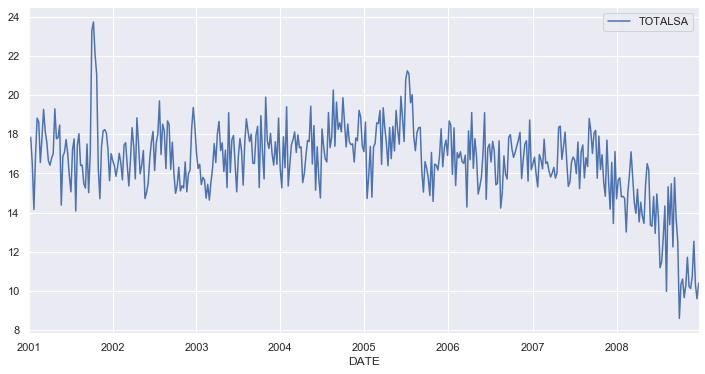

In [24]:
upsampled_auto_01_08.plot.line()

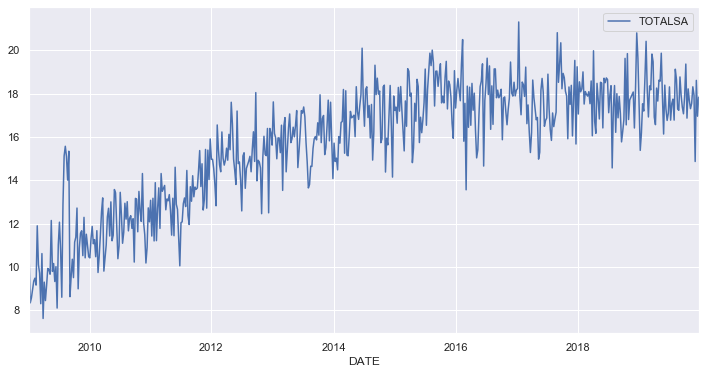

In [25]:
upsampled_auto_09_19.plot.line()

In [26]:
upsampled_auto_01_08.to_csv(r'/Users/bohanzhao/Library/Mobile Documents/com~apple~CloudDocs/NYU share/IAQF/Code/Resample/automobile_sale_01_08.csv')

In [27]:
upsampled_auto_09_19.to_csv(r'/Users/bohanzhao/Library/Mobile Documents/com~apple~CloudDocs/NYU share/IAQF/Code/Resample/automobile_sale_09_19.csv')